# HRDPS 🅱

<style>
  .beta-badge {
    background-color: #f39c12;
    color: white;
    padding: 4px 8px;
    border-radius: 4px;
    font-weight: bold;
  }
</style>

<span class="beta-badge">BETA</span>
<span class="beta-badge">Requires MetPy >=1.6</span>

This demonstrates using data from Canada's High Resolution Deterministic Prediction System (HRDPS).

[HRDPS Model Description](https://eccc-msc.github.io/open-data/msc-data/nwp_hrdps/readme_hrdps-datamart_en/#data-location)


**Data Sources**

|`prioriy=`|Data source| Archive Duration|
|--|--|--|
|`"mcs"` | [Meteorological Service of Canada](https://dd.weather.gc.ca/model_hrdps/) | Last 24 hours

**Model Initialization**

Model cyles every hour.

**Forecast Hour**

For the most recent version of HRRR...

|`fxx=`|Forecast lead time|
|--|--|
|`0` through `48`, step=1| hourly forecasts available


**Products**

|`product=`| Product Description |    
|--|--|
|`"continental/2.5km"`| Continental domain

**Variable and Level**

You will need to specify the variable and level for each request. 

<br>


> **NOTE:** The organization of these files is different than other NWP products.
>
> 1. There are no index files provided.
> 1. Each GRIB2 file only contains one message. The variable name and level is in the file's name.
>
> Herbie requires you provide a keyword argument for both `variable` and `level`. Pay special attention to model description (linked above) to understand how the model data is organized. If you don't provide input for `variable` or `level`, Herbie will give you some ideas. For example, `variable=TMP` and `level=AGL-2m` will give you the filename that contains
>
> ```
> TMP_AGL-2m
> ```

> **Note:** This requires MetPy version 1.6 or greater which has the capability to parse the _rotated latitude longitude_ map projection type (see [MetPy/#3123](https://github.com/Unidata/MetPy/pull/3123)).


In [1]:
from herbie import Herbie
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
from herbie.toolbox import EasyMap, pc
import cartopy.crs as ccrs
import cartopy.feature as feature
import pandas as pd

recent = pd.Timestamp("now").floor("6H") - pd.Timedelta("6H")

/home/blaylock/GITHUB/Carpenter_Workshop/paint/radar2.py:86: SyntaxWarning: invalid escape sequence '\m'
  self.units = "m s$\mathregular{^{-1}}$"
/home/blaylock/GITHUB/Carpenter_Workshop/paint/standard2.py:153: SyntaxWarning: invalid escape sequence '\d'
  self.units = f"$\degree${units}"
/home/blaylock/GITHUB/Carpenter_Workshop/paint/standard2.py:160: SyntaxWarning: invalid escape sequence '\d'
  self.units = f"$\degree${units}"
/home/blaylock/GITHUB/Carpenter_Workshop/paint/standard2.py:309: SyntaxWarning: invalid escape sequence '\d'
  self.units = f"$\degree${units}"
/home/blaylock/GITHUB/Carpenter_Workshop/paint/standard2.py:316: SyntaxWarning: invalid escape sequence '\d'
  self.units = f"$\degree${units}"
/home/blaylock/GITHUB/Carpenter_Workshop/toolbox/stock.py:126: SyntaxWarning: invalid escape sequence '\*'
  """
/home/blaylock/GITHUB/Carpenter_Workshop/toolbox/stock.py:879: SyntaxWarning: invalid escape sequence '\*'
  '''


In [2]:
# Some examples

H = Herbie(
    recent,  # Datetime
    model="hrdps",
    fxx=32,
    product="continental/2.5km",
    variable="TMP",
    level="AGL-2m",
)
H.grib

✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Dec-29 00:00 UTC F32 ┊ GRIB2 @ msc ┊ IDX @ None


'https://dd.weather.gc.ca/model_hrdps/continental/2.5km/00/032/20231229T00Z_MSC_HRDPS_TMP_AGL-2m_RLatLon0.0225_PT032H.grib2'

In [3]:
H = Herbie(
    recent,  # Datetime
    model="hrdps",
    fxx=12,
    product="continental/2.5km",
    variable="HGT",
    level="ISBL_0500",
)
H.grib

✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Dec-29 00:00 UTC F12 ┊ GRIB2 @ msc ┊ IDX @ None


'https://dd.weather.gc.ca/model_hrdps/continental/2.5km/00/012/20231229T00Z_MSC_HRDPS_HGT_ISBL_0500_RLatLon0.0225_PT012H.grib2'

## Get the 2-metre temperature


In [4]:
H = Herbie(
    recent,
    model="hrdps",
    fxx=0,
    product="continental/2.5km",
    variable="TMP",
    level="AGL-2m",
)
ds = H.xarray()
ds

✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Dec-29 00:00 UTC F00 ┊ GRIB2 @ msc ┊ IDX @ None
👨🏻‍🏭 Created directory: [/home/blaylock/data/hrdps/20231229]


/home/blaylock/GITHUB/Herbie/herbie/core.py:1065: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


<xarray.Dataset>
Dimensions:              (y: 1290, x: 2540)
Coordinates:
    time                 datetime64[ns] 2023-12-29
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
    valid_time           datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    model:                   hrdps
    product:                 continental/2.5km
    description:             Canada's High Resolution Deterministic Predictio...
    remote_grib:             /home/blaylock/data/hrdps/20231229/20231229T00Z_...
    local_grib:              /home/blaylock/data/hrdps/20231229/20231229T00Z_...
    search:            None

In [5]:
ds.valid_time.dt.strftime("%Y-%m-%d %H:%M").item()

'2023-12-29 00:00'

## Plot data on Plate Carree projection


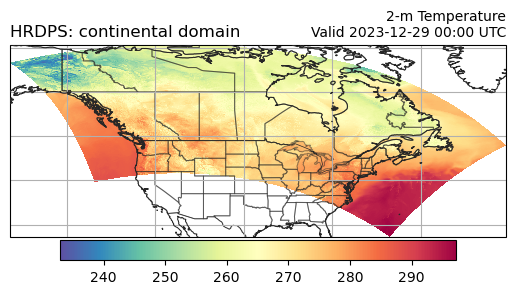

In [6]:
ax = EasyMap("50m").BORDERS().STATES(alpha=0.5).ax
p = ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m, transform=pc, cmap="Spectral_r")
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.01, shrink=0.8)
ax.set_title(
    f"2-m Temperature\nValid {ds.valid_time.dt.strftime('%Y-%m-%d %H:%M').item()} UTC",
    loc="right",
    fontsize=10,
)
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")
ax.gridlines()

## Plot data on model grid projection - rotated latitude longitude

> Requires Metpy >=1.6.0


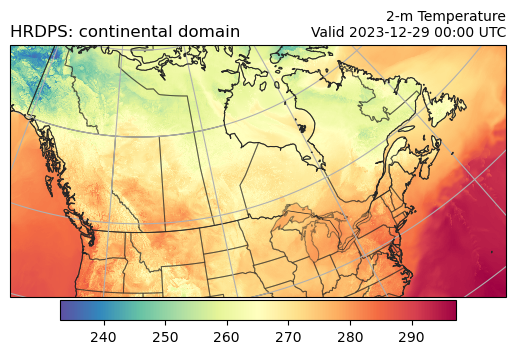

In [7]:
ax = EasyMap("50m", crs=ds.herbie.crs).BORDERS().STATES(alpha=0.5).ax
p = ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m, transform=pc, cmap="Spectral_r")
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.01, shrink=0.8)
ax.set_title(
    f"2-m Temperature\nValid {ds.valid_time.dt.strftime('%Y-%m-%d %H:%M').item()} UTC",
    loc="right",
    fontsize=10,
)
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")
ax.gridlines()

## Get 10-m U _and_ 10-m V wind


In [8]:
# loading more than one variable requires a loop, because the
# data is stored in multiple files (and a Herbie object only
# represents a single file).

store = []
for var, lev in zip(["UGRD", "VGRD"], ["AGL-10m", "AGL-10m"]):
    _ds = Herbie(
        recent,
        model="hrdps",
        fxx=0,
        product="continental/2.5km",
        variable=var,
        level=lev,
    ).xarray()
    store.append(_ds)

ds = xr.merge(store)
ds

✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Dec-29 00:00 UTC F00 ┊ GRIB2 @ msc ┊ IDX @ None


/home/blaylock/GITHUB/Herbie/herbie/core.py:1065: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Dec-29 00:00 UTC F00 ┊ GRIB2 @ msc ┊ IDX @ None


/home/blaylock/GITHUB/Herbie/herbie/core.py:1065: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


<xarray.Dataset>
Dimensions:              (y: 1290, x: 2540)
Coordinates:
    time                 datetime64[ns] 2023-12-29
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 10.0
    latitude             (y, x) float64 39.63 39.63 39.64 ... 47.91 47.89 47.88
    longitude            (y, x) float64 -133.6 -133.6 -133.6 ... -40.73 -40.71
    valid_time           datetime64[ns] 2023-12-29
Dimensions without coordinates: y, x
Data variables:
    u10                  (y, x) float32 ...
    gribfile_projection  object None
    v10                  (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    model:                   hrdps
    product:                 continental/2.5km
    description:             Canada's High Resolution Deterministic Predictio...
    remote_grib:             /home/blaylock/data/hrdps/20231229/20231229T00Z_...
    local_grib:              /home/blaylock/data/hrdps/20231229/20231229T00Z_...
    search:            None

In [9]:
# MetPy version >= 1.6 is required to parse the map projection
ds.herbie.crs

<Derived Geographic 2D CRS: +proj=ob_tran +ellps=sphere +a=6371229.0 +b=637122 ...>
Name: unnamed
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ ob_tran o_proj=latlon
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

<GeoAxes: >

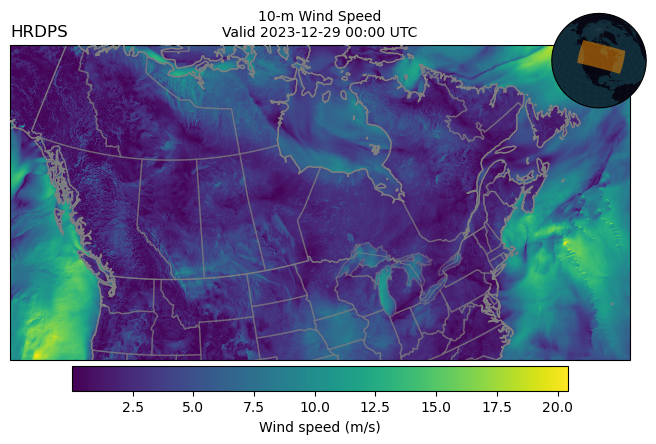

In [10]:
ax = (
    EasyMap("50m", crs=ds.herbie.crs, figsize=8, linewidth=1, theme="dark")
    .BORDERS()
    .STATES(alpha=0.5)
    .ax
)
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    np.hypot(ds.u10, ds.v10),  # Wind Speed
    transform=pc,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.01, shrink=0.8, label="Wind speed (m/s)"
)

ax.set_title(
    f"10-m Wind Speed\nValid {ds.valid_time.dt.strftime('%Y-%m-%d %H:%M').item()} UTC",
    loc="center",
    fontsize=10,
)
ax.set_title(f"{ds.model.upper()}", loc="left")
ax.EasyMap.INSET_GLOBE()

## 500 hPa Humidity and Geopotential Height


In [11]:
# loading more than one variable requires a loop, because the
# data is stored in multiple files (and a Herbie object only
# represents a single file).

store = []
for var, lev in zip(["HGT", "RH"], ["ISBL_0500", "ISBL_0500"]):
    _ds = Herbie(
        recent,
        model="hrdps",
        fxx=0,
        product="continental/2.5km",
        variable=var,
        level=lev,
    ).xarray()
    store.append(_ds)

ds = xr.merge(store)
ds

✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Dec-29 00:00 UTC F00 ┊ GRIB2 @ msc ┊ IDX @ None


/home/blaylock/GITHUB/Herbie/herbie/core.py:1065: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Dec-29 00:00 UTC F00 ┊ GRIB2 @ msc ┊ IDX @ None


/home/blaylock/GITHUB/Herbie/herbie/core.py:1065: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


<xarray.Dataset>
Dimensions:              (y: 1290, x: 2540)
Coordinates:
    time                 datetime64[ns] 2023-12-29
    step                 timedelta64[ns] 00:00:00
    isobaricInhPa        float64 500.0
    latitude             (y, x) float64 39.63 39.63 39.64 ... 47.91 47.89 47.88
    longitude            (y, x) float64 -133.6 -133.6 -133.6 ... -40.73 -40.71
    valid_time           datetime64[ns] 2023-12-29
Dimensions without coordinates: y, x
Data variables:
    gh                   (y, x) float32 ...
    gribfile_projection  object None
    r                    (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    model:                   hrdps
    product:                 continental/2.5km
    description:             Canada's High Resolution Deterministic Predictio...
    remote_grib:             /home/blaylock/data/hrdps/20231229/20231229T00Z_...
    local_grib:              /home/blaylock/data/hrdps/20231229/20231229T00Z_...
    search:            None

Text(0.0, 1.0, 'HRDPS')

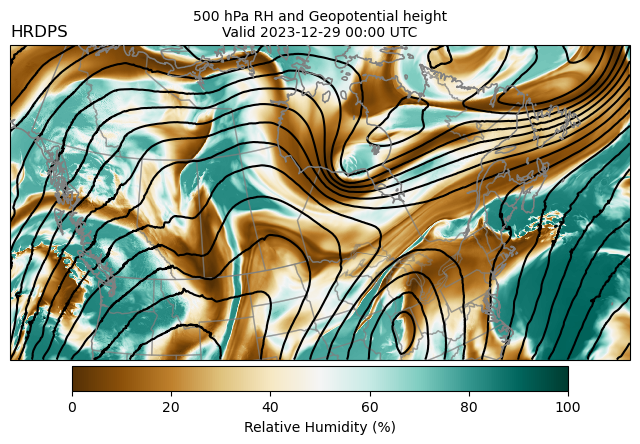

In [12]:
ax = (
    EasyMap("50m", crs=ds.herbie.crs, figsize=8, linewidth=1, theme="dark")
    .BORDERS()
    .STATES(alpha=0.5)
    .ax
)

# Draw Relative Humidity
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.r, transform=pc, cmap="BrBG", vmin=0, vmax=100
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    label="Relative Humidity (%)",
)

# Draw Geopential Height Contours
ax.contour(
    ds.longitude,
    ds.latitude,
    ds.gh,
    colors="k",
    transform=pc,
    levels=range(0, 6000, 40),
)

ax.set_title(
    f"500 hPa RH and Geopotential height\nValid {ds.valid_time.dt.strftime('%Y-%m-%d %H:%M').item()} UTC",
    loc="center",
    fontsize=10,
)
ax.set_title(f"{ds.model.upper()}", loc="left")

<hr>

## HRDPS North domain (experimental)


In [13]:
H = Herbie(
    recent.floor("12H"),  # only run every 00 anc 12 UTC
    model="hrdps_north",
    fxx=0,
    product="north/grib2",
    variable="TMP",
    level="TGL_2",
)
ds = H.xarray()
ds

✅ Found ┊ model=hrdps_north ┊ product=north/grib2 ┊ 2023-Dec-29 00:00 UTC F00 ┊ GRIB2 @ msc ┊ IDX @ None
👨🏻‍🏭 Created directory: [/home/blaylock/data/hrdps_north/20231229]


/home/blaylock/GITHUB/Herbie/herbie/core.py:1065: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


<xarray.Dataset>
Dimensions:              (y: 825, x: 1465)
Coordinates:
    time                 datetime64[ns] 2023-12-29
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
    valid_time           datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    model:                   hrdps_north
    product:                 north/grib2
    description:             Canada's High Resolution Deterministic Predictio...
    remote_grib:             /home/blaylock/data/hrdps_north/20231229/CMC_hrd...
    local_grib:              /home/blaylock/data/hrdps_north/20231229/CMC_hrd...
    search:            None

In [14]:
# This domain is run on a polar stereographic projection
ds.herbie.crs

<Projected CRS: +proj=stere +ellps=sphere +a=6371229.0 +b=6371229. ...>
Name: unknown
Axis Info [cartesian]:
- E[south]: Easting (metre)
- N[south]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Polar Stereographic (variant B)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

<GeoAxes: >

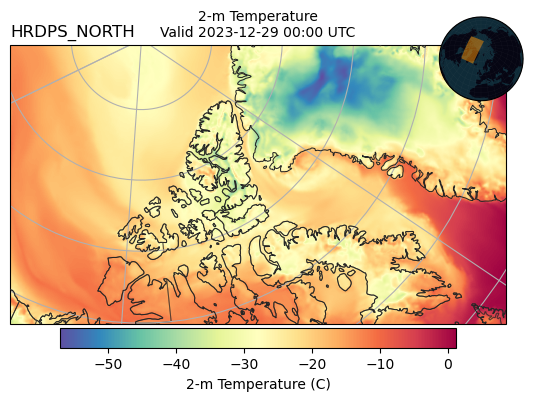

In [15]:
ax = EasyMap("50m", crs=ds.herbie.crs).BORDERS().STATES(alpha=0.5).ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m - 273.15, transform=pc, cmap="Spectral_r"
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    label="2-m Temperature (C)",
)
ax.set_title(f"{ds.model.upper()}", loc="left")
ax.set_title(
    f"2-m Temperature\nValid {ds.valid_time.dt.strftime('%Y-%m-%d %H:%M').item()} UTC",
    loc="center",
    fontsize=10,
)
ax.gridlines()
ax.EasyMap.INSET_GLOBE()